In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import sys
from sklearn.model_selection import train_test_split


# PROJECT_PATH = '/content/' # for google colab
PROJECT_PATH = '../' # for local run
DATASET_DIR = os.path.join(PROJECT_PATH,'DATA')
AVA_DATASET_DIR = os.path.join(DATASET_DIR, 'ava')
TID_DATAST_DIR = os.path.join(DATASET_DIR, 'tid2013')

sys.path.append(PROJECT_PATH)
import nima as nima
from nima.config import print_msg

### Check the TID dataset

In [61]:
from nima.utils.tid_dataset_utils import get_mos_df, get_mos_csv_df

dataset_dir = TID_DATAST_DIR
sample_size=None


tid_df = get_mos_csv_df(dataset_dir)

mean_levels = 5
if sample_size is None or sample_size > len(tid_df):
    sample_size = len(tid_df)
    mean_levels = 1

# Add label for stratification
tid_df['_label'] = np.floor(tid_df['mean'] / mean_levels)
print_msg(f'Number of samples picked {sample_size}', 1)
tid_df = tid_df.sample(n=sample_size).reset_index(drop=True)
df_train, df_test = train_test_split(tid_df, test_size=0.10, shuffle=True, random_state=1024,
                                        stratify=tid_df['_label'])

df_train = df_train.drop(labels='_label', axis=1,).reset_index(drop=True)
df_test = df_test.drop('_label', axis=1, ).reset_index(drop=True)



	Number of samples picked 3000


In [62]:
df_train

,image_id,mean,std
0,i19_11_4,2.94595,0.11432
1,i20_15_2,3.34211,0.13560
2,i11_10_1,5.81081,0.15211
3,i21_22_3,4.44186,0.13279
4,i03_15_5,4.79487,0.14586
...,...,...,...
2695,i10_03_3,4.02564,0.09236
2696,i10_23_4,2.60526,0.09517
2697,i18_12_3,5.56098,0.15445
2698,i20_23_2,6.25641,0.19432


In [55]:
_ = df_train['mean'].hist(), df_test['mean'].hist()

TypeError: 'NoneType' object is not subscriptable

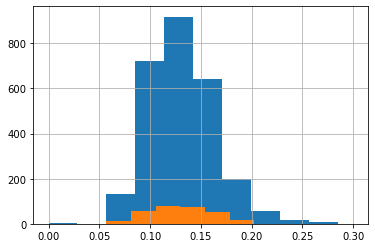

In [49]:
_ = df_train['std'].hist(), df_test['std'].hist()

In [51]:
df_test[''].groupby(by='_label').count(), df_train.groupby(by='_label').count()

(        image_id  mean  std
 _label                     
 0.0            4     4    4
 1.0            5     5    5
 2.0           29    29   29
 3.0           65    65   65
 4.0           75    75   75
 5.0           98    98   98
 6.0           24    24   24,
         image_id  mean  std
 _label                     
 0.0           31    31   31
 1.0           49    49   49
 2.0          263   263  263
 3.0          584   584  584
 4.0          672   672  672
 5.0          879   879  879
 6.0          219   219  219
 7.0            3     3    3)

In [53]:
df_train.drop('_label', axis=1)

,image_id,mean,std
184,i13_17_5,2.58537,0.11427
2749,i12_15_2,3.51429,0.13013
2604,i02_21_2,5.29730,0.12599
1547,i22_05_3,4.87179,0.15461
1336,i10_11_2,4.46154,0.13493
...,...,...,...
1409,i11_24_3,4.62857,0.13453
1082,i16_11_4,2.07500,0.07406
1500,i14_16_2,5.97297,0.15519
413,i24_14_1,6.00000,0.16660


### Check the ava data

In [26]:
from nima.utils.ava_dataset_utils import get_rating_columns, get_ava_csv_score_df

dataset_dir = AVA_DATASET_DIR
sample_size=40000


count_columns = get_rating_columns()  # get the columns representing ratings
ava_csv_df = get_ava_csv_score_df(dataset_dir)  # Get the AVA csv dataframe

keep_columns = ['image_id'] + count_columns + ['_label']
mean_range = 3
if sample_size is None or sample_size > len(ava_csv_df):
    sample_size = len(ava_csv_df)


print_msg(f'Number of samples picked {sample_size}', 1)
# Add label for stratification
ava_csv_df['_label'] = np.floor(ava_csv_df['mean_score'] / mean_range)
df = ava_csv_df.sample(n=sample_size).reset_index(drop=True)

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True,
                                        random_state=1024, stratify=df['_label'])
# df_train, df_valid = train_test_split(df_train, test_size=0.2, shuffle=True,
#                                         random_state=1024, stratify=df_train['_label'])
# df_train = df_train.drop(labels='_label', axis=1).reset_index(drop=True)
# df_test = df_test.drop('_label', axis=1).reset_index(drop=True)
# df_valid = df_valid.drop('_label', axis=1).reset_index(drop=True)


	Number of samples picked 15084


In [27]:
ava_csv_df.groupby(by='_label').count()[['image_id']]

# ava_csv_df[ava_csv_df['mean_score'] < 2]

,image_id
_label,
0.0,49
1.0,12469
2.0,2566


(<AxesSubplot:>, <AxesSubplot:>)

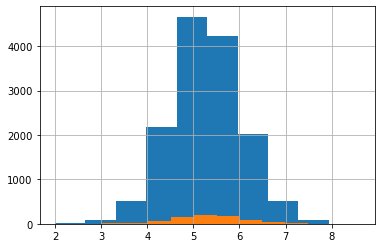

In [28]:
df_train['mean_score'].hist(), df_test['mean_score'].hist()

(<AxesSubplot:>, <AxesSubplot:>)

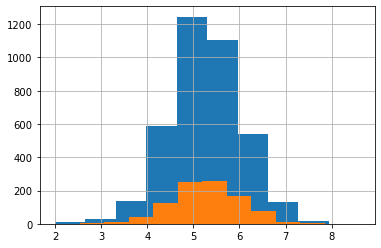

In [75]:
df_train['mean_score'].hist(), df_valid['mean_score'].hist()

In [76]:
df_train.columns.tolist()

[autoreload of nima.utils.ava_dataset_utils failed: Traceback (most recent call last):
  File "C:\Users\amaindola\Anaconda3\envs\img-quality-assesment\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\amaindola\Anaconda3\envs\img-quality-assesment\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\amaindola\Anaconda3\envs\img-quality-assesment\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\amaindola\Anaconda3\envs\img-quality-assesment\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 844, in exec_module
  File "<frozen importlib._bootstrap_external>", line 981, in get_code
  File "<frozen importlib._bootstrap_external>", line 911, in source_to_code
 

,index,image_id,max_rating,mean_score,std_score,count_rating_1,count_rating_2,count_rating_3,count_rating_4,count_rating_5,count_rating_6,count_rating_7,count_rating_8,count_rating_9,count_rating_10,tag_1,tag_2,challange_id
0,138105,12550,5,6.220,4.519,0,0,3,10,22,24,10,9,9,4,0,0,69
1,211899,10619,4,5.180,5.271,8,10,15,36,50,43,29,16,3,1,0,0,54
2,116,954200,4,4.944,2.484,0,0,8,29,61,19,6,1,1,0,0,0,1396
3,66996,138922,5,6.531,4.759,0,2,4,15,41,62,36,35,19,12,0,0,301
4,236941,10336,4,6.252,4.638,0,4,6,11,48,47,36,37,7,6,2,23,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,11096,136638,4,5.427,3.991,3,3,4,26,62,55,20,9,3,0,1,20,299
3796,29608,134381,4,5.118,3.264,0,3,15,41,90,48,13,8,2,0,15,22,297
3797,142227,120022,2,4.026,5.235,26,33,66,61,65,32,12,3,1,6,22,25,274
3798,247524,132916,4,4.476,5.565,9,31,35,57,58,32,15,10,4,3,1,29,294
